# Customer Churn at Telco

## Project Description
Telco is a telecommunication company. The Telco wants to predict customer churn to retain customers who are leaving. The goal of the project is to analyze the data, find driving features of customer churn, predict cusotmer churn, and recommend actions to reduce customer churn.

## Goals:

   - Discover driver of customer churn at Telco
   - Use drivers to develop a model to predict customer churn
   - Offer recommendation to  reduce customer churn

## Initial Questions: 
   - Find percentage of churn
   - Does dependents effect on customer churn?
   - Do customers who churn have a higher average monthly charge than customers who do not churn?
   - Is contract type a driving factor of customer churn?
   - Do customers with tech support less likely to churn than customers without tech support?




## Imports

In [1]:
# imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import acquire
import prepare
import explore as e
import modelling as m

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


## Acquire

- Acquired data from Telco_churn database from Codeup database using acquire.py file
- It contained 7048 rows and 48 columns
- Each row represents a customer
- Each column represents a feaures of an individial customer.


In [2]:
# set options to display all columns
pd.options.display.max_columns = None

# set seed at 42
seed =42

In [3]:
# acquire telco data using function from acquire module
telco_original = acquire.get_telco_data()

In [4]:
# look at the data
telco_original.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


## Prepare

#### Prepare Actions:
- Removed unwanted columns
- Checked for Nulls, no Null, but found white space in column: total_charges.
- Replaced white space with 0 (zero).
- Converted total_charges dtypes from object to float
- Created a list of categorical variables
- Encoded categorical varibales
- Converted column names into lower case
- split data into train, validate and test (approx. 56/24/20)

In [5]:
# acquire clean data using function from prepare module
telco= prepare.prep_telco(telco_original)

In [6]:
# take a look at the data
telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,paperless_billing_yes,churn_yes,multiple_lines_no,multiple_lines_no phone service,multiple_lines_yes,online_security_no,online_security_no internet service,online_security_yes,online_backup_no,online_backup_no internet service,online_backup_yes,device_protection_no,device_protection_no internet service,device_protection_yes,tech_support_no,tech_support_no internet service,tech_support_yes,streaming_tv_no,streaming_tv_no internet service,streaming_tv_yes,streaming_movies_no,streaming_movies_no internet service,streaming_movies_yes,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,contract_type_month-to-month,contract_type_one year,contract_type_two year,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [7]:
#  split data using function from prepare module
train, validate, test = prepare.train_validate_test_split(telco, 'churn')

In [8]:
# take a look at the shape of data
train.shape, validate.shape, test.shape

((3943, 58), (1691, 58), (1409, 58))

In [9]:
# take a look at the data of train 
train.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,paperless_billing_yes,churn_yes,multiple_lines_no,multiple_lines_no phone service,multiple_lines_yes,online_security_no,online_security_no internet service,online_security_yes,online_backup_no,online_backup_no internet service,online_backup_yes,device_protection_no,device_protection_no internet service,device_protection_yes,tech_support_no,tech_support_no internet service,tech_support_yes,streaming_tv_no,streaming_tv_no internet service,streaming_tv_yes,streaming_movies_no,streaming_movies_no internet service,streaming_movies_yes,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,contract_type_month-to-month,contract_type_one year,contract_type_two year,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check
4604,6490-FGZAT,Male,0,No,No,6,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.65,109.30,No,None,Month-to-month,Mailed check,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4051,5707-ORNDZ,Male,1,No,No,9,Yes,Yes,Yes,No,No,No,No,No,No,54.55,494.05,Yes,DSL,Month-to-month,Electronic check,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5159,7252-NTGSS,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,45.15,45.15,No,DSL,Month-to-month,Mailed check,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


## Explore

### Find percentage of churn


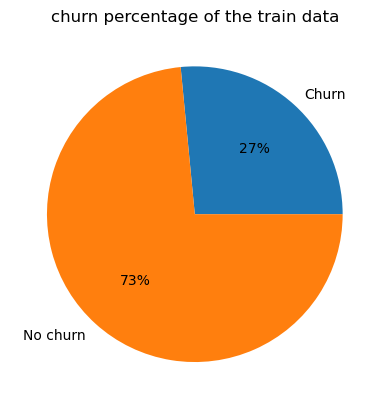

In [10]:
# get pie chart of churn using a function of explore module
e.vis_pie_churn(train)

27% of the customers churn in train data

### Does dependents effect on customer churn?

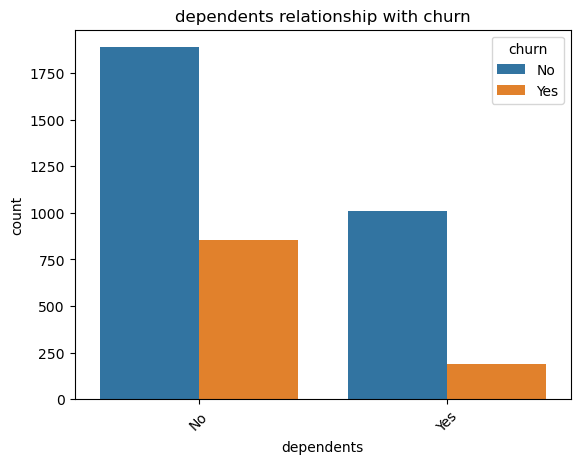

In [11]:
# visualization of dependents using a function of explore module
e.vis_countplot('dependents', train)

From graph, we can say that dependents is not a significant driver of customer churn. 

I will perform chi-square test to see if dependents and churn are independent. I will use alpha value of 0.05

In [12]:
# creae a list 
cat_cols= ['dependents']

# run chi-square and get result using a function of explore module
e.chi_test(cat_cols, train)

dependents: 

Null Hypothesis: dependents and churn are independent

Alternative Hypothesis: dependents and churn are dependent

chi^2 = 100.06930009717803
p     = 1.47156924105124e-23

We reject null hypothesis
There exists some relationship between dependents and churn.
--------------------------------------------------------------------------------------------



Chi-square test result: p-value less than alpha and low chi^2 score bolster our conclusion from the graph that dependents is not a significant driver of customer churn.

### Do customers who churn have a higher average monthly charge than customers who do not churn?

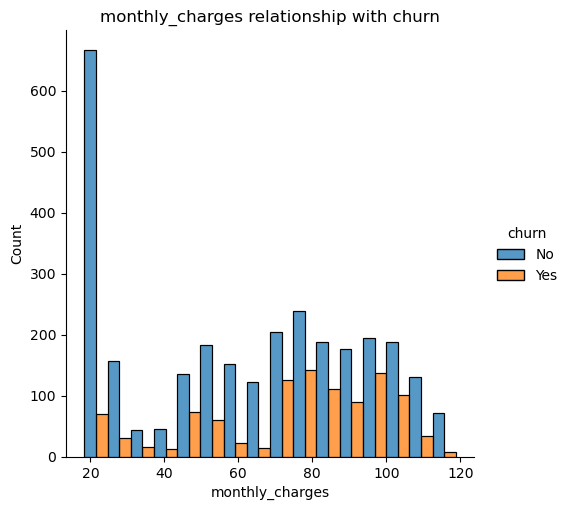

In [13]:
# visualization of monthly chages using a function of explore module
e.vis_distplot('monthly_charges', train)

From graph, we can say that customers who churn pays higher monthly charges. Customer churn increases with an increase of monthly charges.

I will use Independet t-test (1 tail, a significantly larger) to see if mean of monthly_charges of customers who churn is greater than mean of monthly_charges of customers who do not churn. I will use alpha value of 0.05

In [14]:
# creae a list
num_cols =['monthly_charges']

# run t-test and get result using a function of explore module
e.ind_t_test_greater(num_cols, train)

Null Hypothesis: mean of monthly_charges of customers who churned is less or equal to mean of monthly_charges of customers who haven't churned

Alternative Hypothesis: mean of monthly_charges of customers who churn is greater than mean of monthly_charges of customers who haven't churned

t: 12.868714695514663
p: 1.1731781534733783e-36

we reject null hypothesis

mean of monthly_charges of customers who churn is greater than mean of monthly_charges of customers who haven't churned
--------------------------------------------------------------------------------------------



From Independet t-test (1 tail, a significantly larger) results, we found that P-value/2  is less than alplha and t value is greater than 0 and we rejected the null hypotheisis.  Therefore, we can say that customers who churn have higher average monthly charges than customers who haven't churned.

### Is contract type driver factor of customer churn?

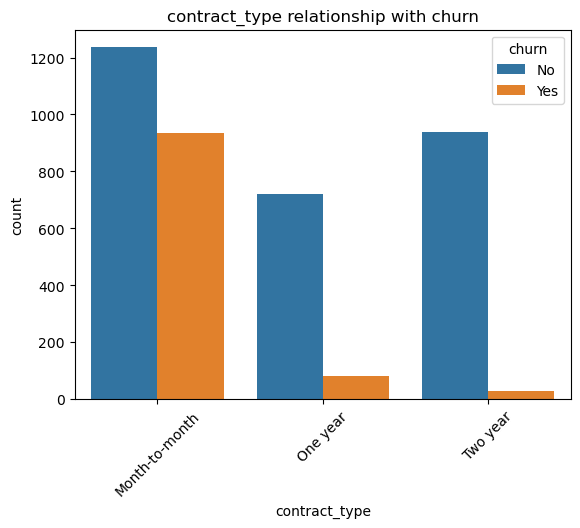

In [15]:
# visual of contract type using a function of explore module
e.vis_countplot('contract_type', train)

From graph, we can see that customers with month-to-month contract type churn highly than customers with other contracts.


I will use chi-sure test to see if contract_type and churn are independent. I will use alpha value of 0.05

In [16]:
# creae a list
cat_cols= ['contract_type']

# run chi-square and get result using a function of explore module
e.chi_test(cat_cols, train)

contract_type: 

Null Hypothesis: contract_type and churn are independent

Alternative Hypothesis: contract_type and churn are dependent

chi^2 = 692.8954456843198
p     = 3.4647005236339834e-151

We reject null hypothesis
There exists some relationship between contract_type and churn.
--------------------------------------------------------------------------------------------



Chi-squre test result shows that p-value is less than alpha. Therefore, contract_type and churn are dependent. Also, higher Chi^2 score tells us that contract_type and churn are highly dependent.

### Do customers with tech support less likely to churn than customers without tech support?

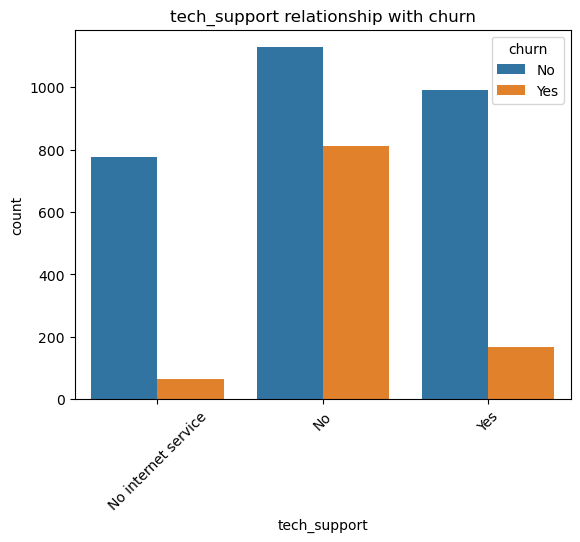

In [17]:
# visualization of tech_support using a function of explore module
e.vis_countplot('tech_support', train)

From graph, we can say that customers with tech support are less likely to churn than customers without tech support.

### Gender and dependents relations with churn

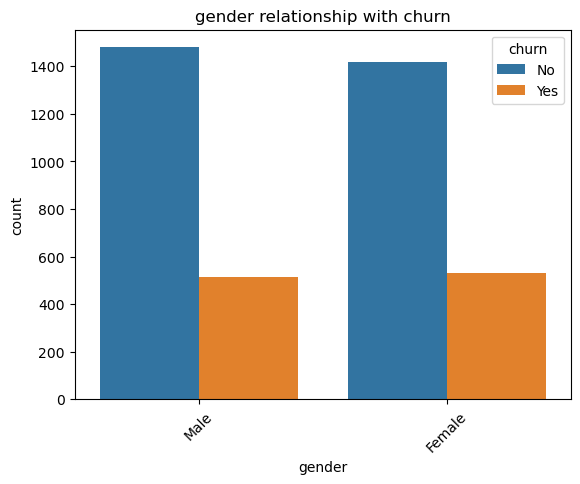

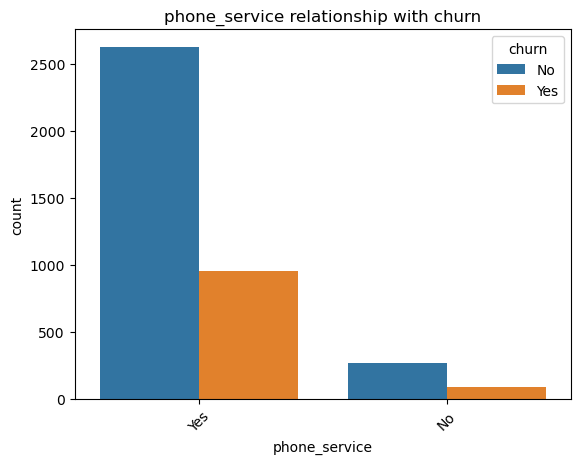

gender: 

Null Hypothesis: gender and churn are independent

Alternative Hypothesis: gender and churn are dependent

chi^2 = 1.2032249809003344
p     = 0.2726780599953642

We fail to reject null hypothesis
There appears to be no significant relationship between gender and churn.
--------------------------------------------------------------------------------------------

phone_service: 

Null Hypothesis: phone_service and churn are independent

Alternative Hypothesis: phone_service and churn are dependent

chi^2 = 0.4338671508044712
p     = 0.5100974716264193

We fail to reject null hypothesis
There appears to be no significant relationship between phone_service and churn.
--------------------------------------------------------------------------------------------



In [18]:
# creae a list
cat_cols= ['gender', 'phone_service']

# visualization 
e.vis_countplot_cat(cat_cols,train)

# run chi-square and get result using a function of explore module
# I will use aplha of 0.05
e.chi_test(cat_cols, train)

From graph and chi-squre test result, was can say that gender and churn do not have significant relationship.

From graph chi-squre test result, was can say that phone service and churn do not have significant relationship.

### Exploration Summary:

- gender and phone service were not found be to a driver of churn

- senior citizen,partner, dependents, multiple lines, streaming tv, streaming movie, paperless billing have dependent relationship with churn but are not main contributors of churn.

- tenure, monthly charges, total charges, no online security, no online backup, no tech support, fiber optic internet service, month-to-month contract and electronic check payment were found to be main drivers of customer churn


I am going to use only main drivers: tenure, monthly charges, total charges, no online security, no online backup, no tech support, fiber optic internet service, month-to-month contract and electronic check payment
on modelling.
    

## Modeling

-  I will use train data and validate data on different models with variou parameters to get the model that performs the best.Then, I will use the test data on the best model to get predicitons.
- I will use my baseline accuracy as my evaluation metric. My baseline accuracy is around 73%.
- I will use following four models with various hyperparameterts to get the best model:
    - Decision Tree
    - Random Forest
    - KNN
    - Logistic Research
 

In [19]:
# prep data for modeling using a function from modelling module
X_train, X_validate, X_test, y_train, y_validate, y_test= m.prep_model(train,validate,test)

#### Baseline Prediction: 

In [20]:
# get beseline accuracy using a function from modelling module
m.get_baseline_accuracy(X_train, y_train)

Baseline accuracy: 0.7347197565305605


My baseline accuracy is 73% . 

#### Model 1: Decision Tree

In [21]:
# get accuracy score using a function from modelling module
m.get_decision_tree(X_train, X_validate, y_train, y_validate)

Decision Tree Accuracy score on train set: 0.8206949023586102
Decsion Tee Accuracy score on validate set: 0.7835600236546422


#### Model2: Random forest

In [22]:
# get accuracy score using a function from modelling module
m.get_random_forest(X_train, X_validate, y_train, y_validate)

Random Forest Accuracy score on train set: 0.8394623383210753
Random Forest score on validate set: 0.797752808988764


#### Model3: KNN

In [23]:
# get accuracy score using a function from modelling module
m.get_knn(X_train, X_validate, y_train, y_validate)

KNN Accuracy score on train set: 0.8138473243723053
KNN Accuracy score on validate set: 0.7764636309875813


#### Model4: Logistic Regression

In [24]:
# get accuracy score using a function from modelling module
m.get_logistic_regression(X_train, X_validate, y_train, y_validate)

Logistic Regression Accuracy score on train set: 0.8047172203905656
Logistic Regression Accuracy score on validate set: 0.7906564163217031


### Comparing Models

- All models perform better to baseline on train and validate 
- All models perform better on train to validate.
- Random Forest and Logistic Regression both have the highest accuracy validate to other models. Between Random Forest and Logistic Regression, Logistic Regression seems less overfit than Random Forrest. Therefore,I pick Logistic Regression as the optimal model. Logistic Regression model has train accuracy of 80% and validate accuracy of 79%

Use Logistic Regression model on test data

## Model Evaluation

I will use Logisitic Regression on test data

In [25]:
# print accuracy score of test data and return dataframe with predictions using a function from modelling module

result = m.get_logistic_regression_test(X_train, X_validate, y_train, y_validate, X_test, y_test,test)

Logistic Regression Accuracy score on test set: 0.7906316536550745


Logistic Regression accuracy on test data is about 79 % which is better than our baseline accuracy of 73% by 6%.

### Modelling summary: 
- All models perform better to baseline on train and validate 
- All models perform better on train to validate.
- Random Forest and Logistic Regression both have the highest accuracy validate to other models. Between Random Forest and Logistic Regression, Logistic Regression seems less overfit than Random Forrest. Therefore, Logisitc Regression model is picked as the best model
- Logistic Regression model has accuracy score of about 79% on test data. It performed better than the basline accuracy by 9% 

## Conclusions
- Customer churn is about 27% on train data.
- Gender and Phone service are not driving customer churn.
- online security, online backup, device protection, tech support, internet service type, tenure, monthly charges, and total charges are main drivers of customer churn.
- Customers with high monthly charges churn in higher ratio.
- Contract type is one of main driver of customer churn. Customers with contract type of month-to-month churn in higher ratio than customers with other contract type
- Customers with add on : online security, online backup, device protection, and tech support churn less than customers who do do not have those add on.

#### Recommendations: 
- maintian constant monthly charges or lower monthly charges to retain customer who churn when monthly charges increases.
- run programs or offers that increase customer to sign one year or two year contract. Customers with contranct of monht-to-month churn more than customers with contract of one year or two year.
- Customer with additional package like online security, online backup, device protection, and tech support tends to less churn so run programs that increase customer to add those packages.
- increase customers to have automacit payment and discourage electronic check because customer with electronic check tends to churn higher than customers with other payment type.

#### Next Steps:


- I will combine more than two attributes to see their effects on  churn.
- I will use differemt hyperparameters on models to see if I can get a model with a better result than one I have now. 